In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, genpareto

/home/wcx/GD_project/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# real = torch.load('DistShift_wind/fake5.pt')
c = 0.75
k = 10
data_type = "wind"
gpu_id = 2
X = torch.load(f'real_{data_type}.pt').cuda(gpu_id)
X_s = torch.load(f'DistShift_{data_type}/fake{k}.pt')
n = len(X)
val = int((c**k) * n)
real = torch.cat([X[:val], X_s[:n - val]], 0)
real = X_s

# real = torch.load('real_wind.pt')

In [3]:
sums = torch.trapezoid(real, dx=1 / 4).cpu().numpy() / 10
# genpareto_params = genpareto.fit(sums)
# print(genpareto_params)
# tail_rv = genpareto(*genpareto_params)
# plt.scatter(sums, tail_rv.pdf(sums))
# # _ = plt.hist(sums.squeeze(), bins=30, alpha=0.1, density=True)
# print(sums)

In [4]:
percentile = (100*(1-(0.75**10)))
print(percentile)
tail = np.where(sums > np.percentile(sums, percentile))[0][-1]
print(tail)

94.36864852905273
698


In [5]:
body_dist, tail_dist = sums[tail:], sums[:tail]

In [6]:
skewnorm_params = skewnorm.fit(sums)
genpareto_params = genpareto.fit(tail_dist - sums[tail])

In [7]:
body_rv = skewnorm(*skewnorm_params)
tail_rv = genpareto(*genpareto_params)

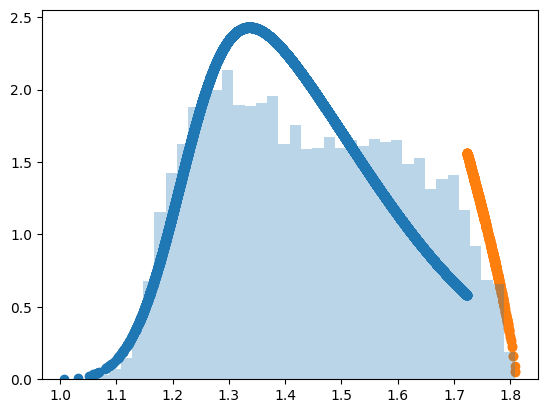

In [8]:
plt.scatter(body_dist, body_rv.pdf(body_dist))
# plt.scatter(tail_dist, tail_rv.pdf(tail_dist - sums[tail]))
plt.scatter(tail_dist, (1-body_rv.cdf(sums[tail]))*tail_rv.pdf(tail_dist - sums[tail]))
_ = plt.hist(sums.squeeze(), bins=40, alpha=0.3, density=True)

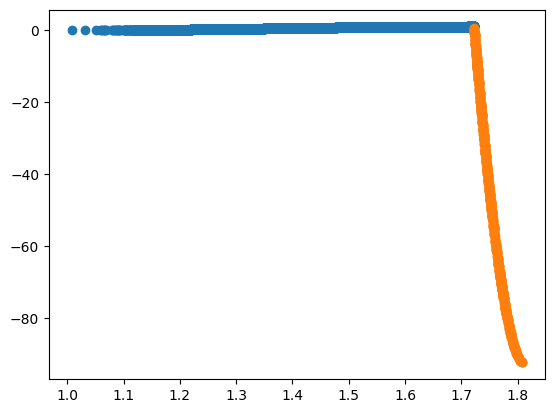

In [9]:
plt.scatter(body_dist, body_rv.cdf(body_dist))
plt.scatter(tail_dist, body_rv.cdf(body_dist[0])+(1-percentile)*tail_rv.cdf(tail_dist - sums[tail]))

In [10]:
sums[tail]

array([1.722586], dtype=float32)

In [11]:
genpareto_params

(-0.5605428267884475, -0.00022661448484334438, 0.048927499291783305)

In [12]:
skewnorm_params

(3.9599997632762975, 1.216385386020043, 0.2860632091862091)